In [2]:
import pandas as pd
from pathlib import Path

base = Path(r"C:\Users\Hareeshwar\Downloads\clouddataset")
data_dir = base / "data"
out_dir = base / "output"

print("Project root:", base)
print("Data dir:", data_dir)
print("Output dir:", out_dir)

medal_tally = pd.read_csv(out_dir / "medal_tally_all_years.csv")
career = pd.read_csv(out_dir / "athlete_career_summary.csv")
events = pd.read_csv(out_dir / "event_participation_by_year.csv")
top_countries = pd.read_csv(out_dir / "top_countries_all_time.csv")
gender_trends = pd.read_csv(out_dir / "gender_participation_trends.csv")
dominant_sports = pd.read_csv(out_dir / "dominant_sport_per_country.csv")

print("Loaded datasets:")
print("medal_tally:", medal_tally.shape)
print("career:", career.shape)
print("events:", events.shape)
print("top_countries:", top_countries.shape)
print("gender_trends:", gender_trends.shape)
print("dominant_sports:", dominant_sports.shape)


Project root: C:\Users\Hareeshwar\Downloads\clouddataset
Data dir: C:\Users\Hareeshwar\Downloads\clouddataset\data
Output dir: C:\Users\Hareeshwar\Downloads\clouddataset\output
Loaded datasets:
medal_tally: (3282, 7)
career: (135571, 11)
events: (6192, 7)
top_countries: (100, 2)
gender_trends: (69, 3)
dominant_sports: (136, 3)


In [3]:
# Cell A — imports and setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

sns.set(style="whitegrid", rc={"figure.figsize": (10,6)})
base = Path(r"C:\Users\Hareeshwar\Downloads\clouddataset")
out_dir = base / "output"
fig_dir = out_dir / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

# reload dataframes if needed
medal_tally = pd.read_csv(out_dir / "medal_tally_all_years.csv")
top_countries = pd.read_csv(out_dir / "top_countries_all_time.csv")
gender_trends = pd.read_csv(out_dir / "gender_participation_trends.csv")
dominant_sports = pd.read_csv(out_dir / "dominant_sport_per_country.csv")
events = pd.read_csv(out_dir / "event_participation_by_year.csv")

print("Figures will be saved to:", fig_dir)


Figures will be saved to: C:\Users\Hareeshwar\Downloads\clouddataset\output\figures


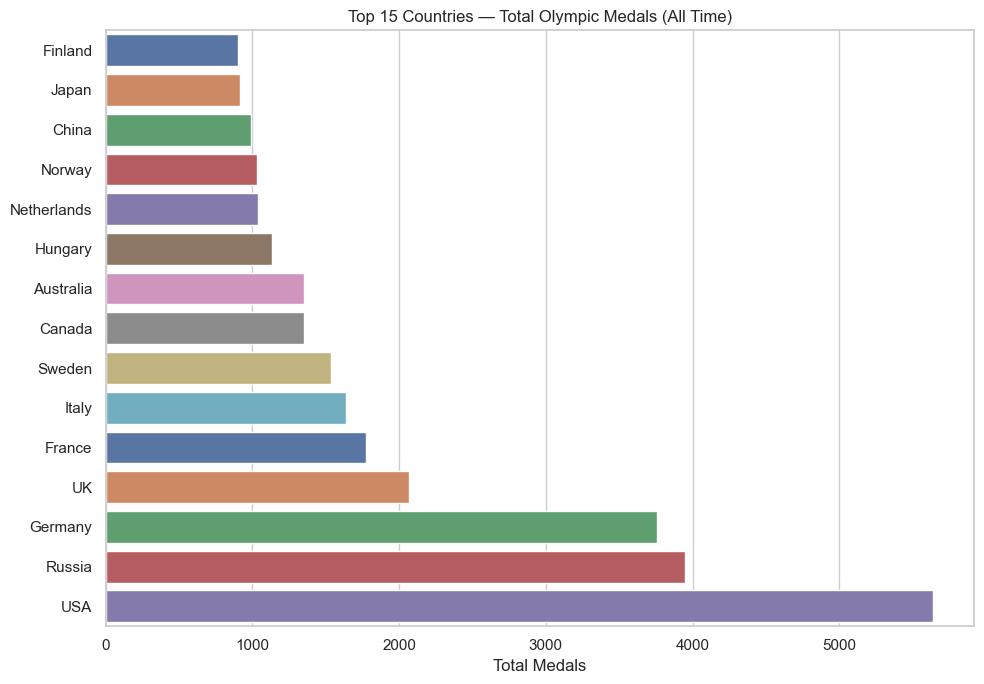

Saved: top15_countries_total_medals.png


In [5]:
# Cell B — Top 15 countries by total medals (horizontal bar)
top15 = top_countries.head(15).copy()
top15 = top15.sort_values("total_medals_all_time")  # ascending for horizontal bar

plt.figure(figsize=(10,7))
sns.barplot(
    x="total_medals_all_time",
    y="region_name",
    data=top15,
    hue="region_name",
    palette="deep",
    dodge=False,
    legend=False
)
plt.title("Top 15 Countries — Total Olympic Medals (All Time)")
plt.xlabel("Total Medals")
plt.ylabel("")
plt.tight_layout()
fname = fig_dir / "top15_countries_total_medals.png"
plt.savefig(fname, dpi=150)
plt.show()
print("Saved:", fname.name)


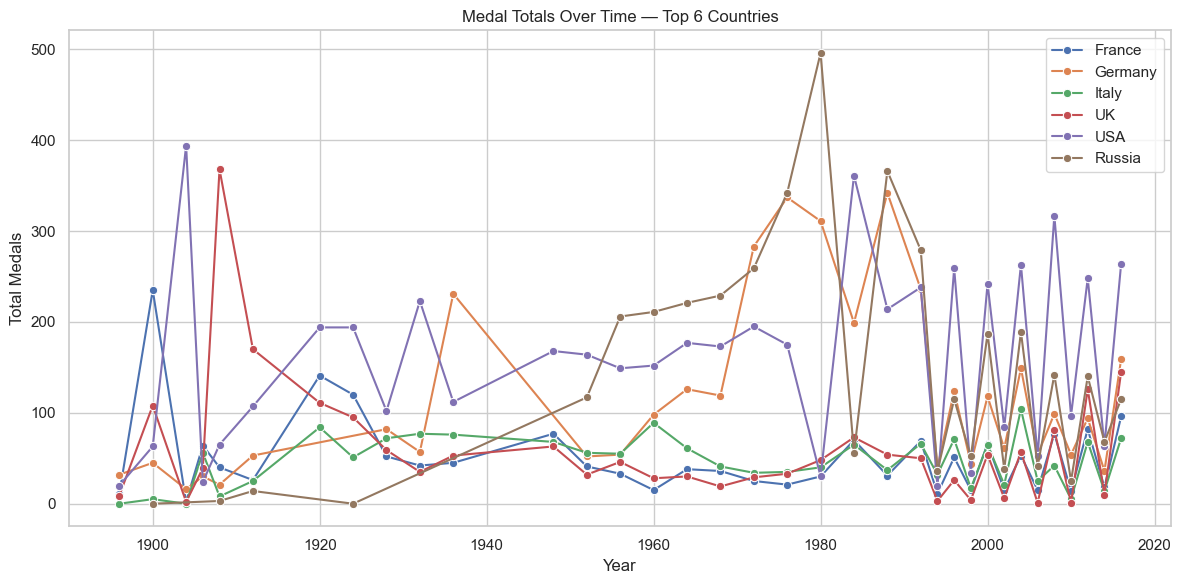

Saved: medals_over_time_top6.png


In [6]:
# pick top 6 from top_countries
top6 = top_countries.head(6)["region_name"].tolist()
df = medal_tally[medal_tally["region_name"].isin(top6)].copy()
# aggregate by year and region
agg = df.groupby(["year","region_name"], as_index=False)["total"].sum()
plt.figure(figsize=(12,6))
sns.lineplot(data=agg, x="year", y="total", hue="region_name", marker="o")
plt.title("Medal Totals Over Time — Top 6 Countries")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.legend(title="")
plt.tight_layout()
fname = fig_dir / "medals_over_time_top6.png"
plt.savefig(fname, dpi=150)
plt.show()
print("Saved:", fname.name)


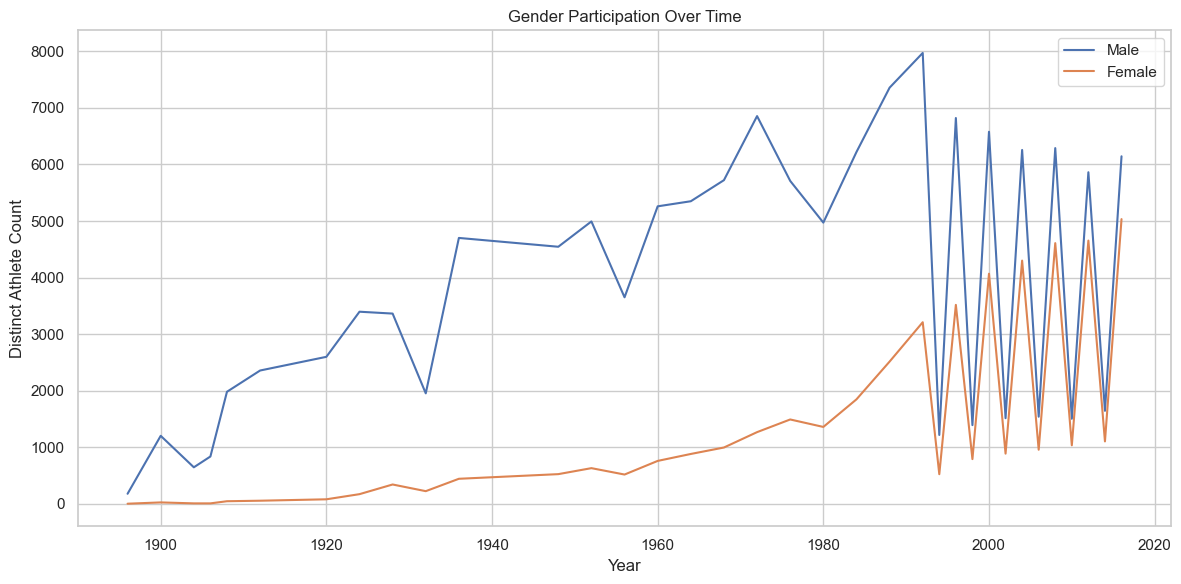

Saved: gender_participation_trends.png


In [7]:
# Cell D — Gender participation trends
# gender_trends has columns: year, sex, athlete_count
g = gender_trends.copy()
# ensure types
g["year"] = g["year"].astype(int)
pivot = g.pivot(index="year", columns="sex", values="athlete_count").fillna(0)
plt.figure(figsize=(12,6))
if "M" in pivot.columns:
    sns.lineplot(x=pivot.index, y=pivot["M"], label="Male")
if "F" in pivot.columns:
    sns.lineplot(x=pivot.index, y=pivot["F"], label="Female")
plt.title("Gender Participation Over Time")
plt.xlabel("Year")
plt.ylabel("Distinct Athlete Count")
plt.legend()
plt.tight_layout()
fname = fig_dir / "gender_participation_trends.png"
plt.savefig(fname, dpi=150)
plt.show()
print("Saved:", fname.name)


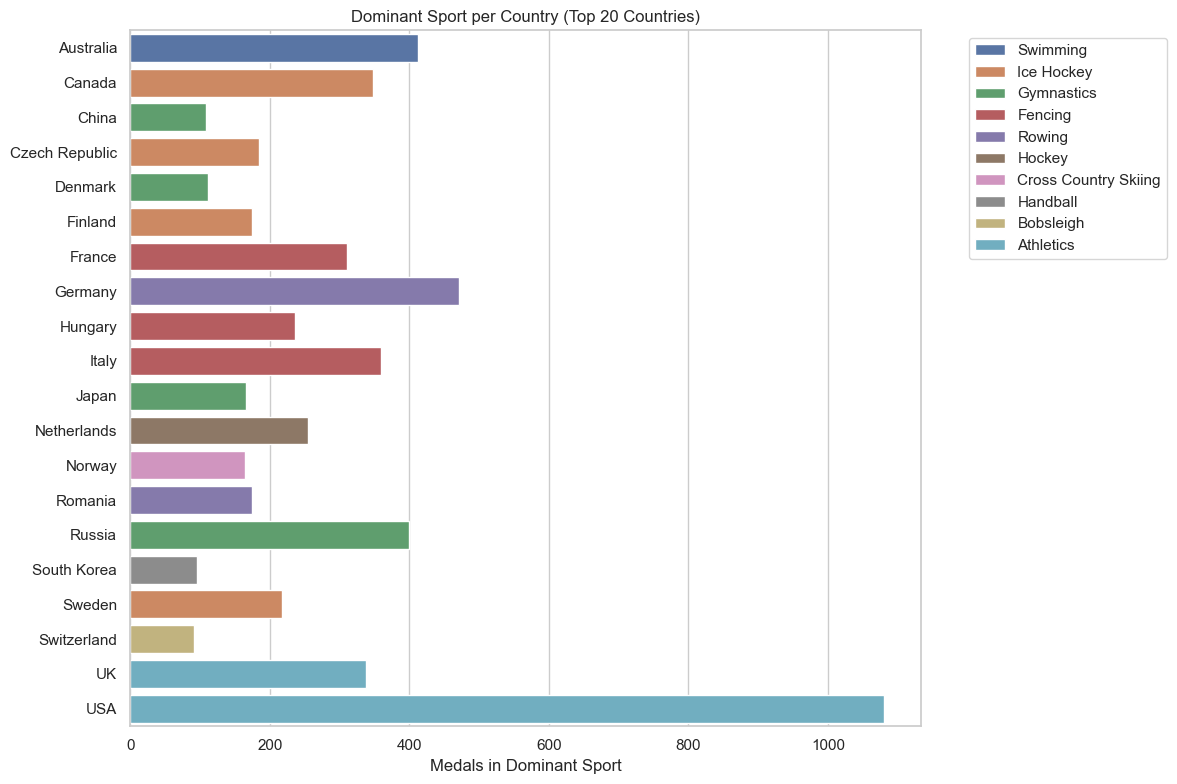

Saved: dominant_sport_top20.png


In [8]:
# Cell E — Dominant sport for top countries
dom = dominant_sports.copy()
# merge with top_countries to limit to popular countries
top100 = top_countries.head(100)["region_name"].tolist()
dom_top = dom[dom["region_name"].isin(top100)].copy()
# pick top 20 by country total medals (using top_countries ordering)
top20 = top_countries.head(20)["region_name"].tolist()
dom20 = dom_top[dom_top["region_name"].isin(top20)].copy()

plt.figure(figsize=(12,8))
# create a categorical bar: one bar per country, colored by sport (use sport as hue)
sns.barplot(x="total_medals", y="region_name", data=dom20, hue="sport", dodge=False)
plt.title("Dominant Sport per Country (Top 20 Countries)")
plt.xlabel("Medals in Dominant Sport")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
fname = fig_dir / "dominant_sport_top20.png"
plt.savefig(fname, dpi=150)
plt.show()
print("Saved:", fname.name)


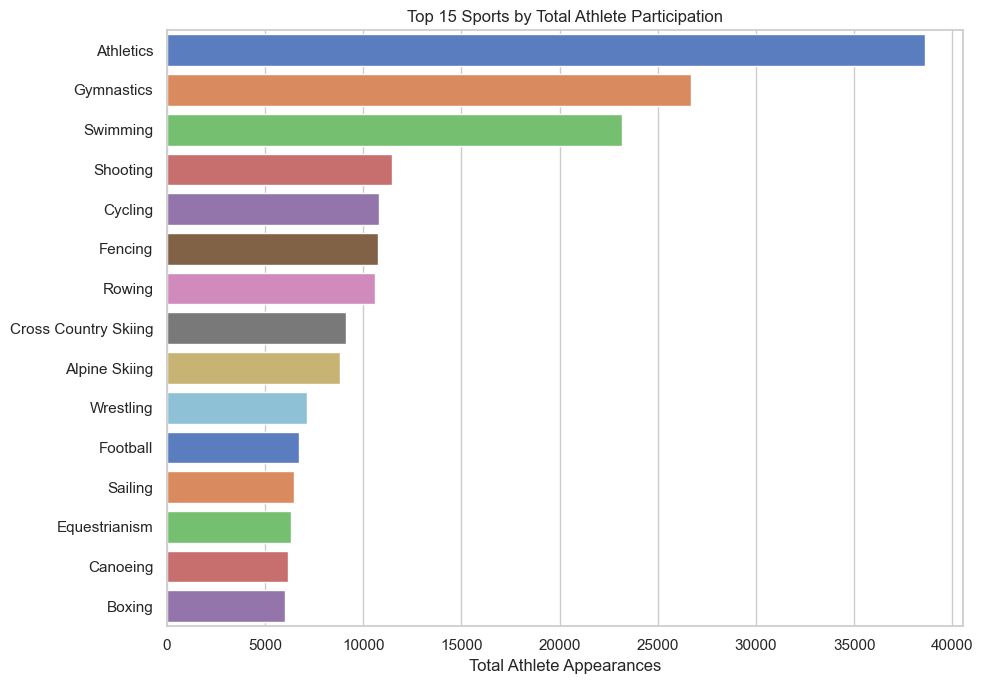

Saved: top_sports_by_athletes.png


In [10]:
# Cell F — Top sports by number of athletes (overall)
ev = events.copy()
# events contains sport, event, year, num_athletes, num_countries, medals_awarded
# aggregate by sport using original athlete file if needed — we'll use events dataset
if "sport" in ev.columns:
    sport_agg = ev.groupby("sport", as_index=False)["num_athletes"].sum().sort_values("num_athletes", ascending=False).head(15)
    plt.figure(figsize=(10,7))
    sns.barplot(
    x="num_athletes",
    y="sport",
    data=sport_agg,
    hue="sport",
    palette="muted",
    dodge=False,
    legend=False
)
    plt.title("Top 15 Sports by Total Athlete Participation")
    plt.xlabel("Total Athlete Appearances")
    plt.ylabel("")
    plt.tight_layout()
    fname = fig_dir / "top_sports_by_athletes.png"
    plt.savefig(fname, dpi=150)
    plt.show()
    print("Saved:", fname.name)
else:
    print("events dataset does not contain 'sport' column — skip this chart")


In [11]:
# Cell G — list files
import os
files = sorted([p.name for p in fig_dir.glob("*.png")])
print("Created figure files:", files)


Created figure files: ['dominant_sport_top20.png', 'gender_participation_trends.png', 'medals_over_time_top6.png', 'top15_countries_total_medals.png', 'top_sports_by_athletes.png']
